In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.8)
colorcycle = [(0.498, 0.788, 0.498),
              (0.745, 0.682, 0.831),
              (0.992, 0.753, 0.525),
              (0.220, 0.424, 0.690),
              (0.749, 0.357, 0.090),
              (1.000, 1.000, 0.600),
              (0.941, 0.008, 0.498),
              (0.400, 0.400, 0.400)]
sns.set_palette(colorcycle)
mpl.rcParams['figure.max_open_warning'] = 65
mpl.rcParams['figure.figsize'] = [12, 7]

from speclib import misc, plotting, loaders

%matplotlib inline

In [2]:
df = pd.read_pickle('../../allan_data/RGender_.pkl')
userAlias = loaders.Useralias()
df.index = df.index.map(lambda s: userAlias[s])
q = misc.QuestionCompleter(df)
f = misc.QuestionFilterer(df)

df.head()

,function_duties__answer,function_duties__answer_type,function_duties__question,function_duties__response,function_duties__condition,narcissism_opponents__answer,narcissism_opponents__answer_type,narcissism_opponents__question,narcissism_opponents__response,narcissism_opponents__condition,...,selfesteem_proud__answer_type,selfesteem_proud__question,selfesteem_proud__response,selfesteem_proud__condition,narcissism_excellent__answer,narcissism_excellent__answer_type,narcissism_excellent__question,narcissism_excellent__response,narcissism_excellent__condition,gender
u0001,0.0,radio,At varetage dine praktiske pligter i hjemmet?,Slet ikke,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,3.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,4,False,male
u0002,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,2.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",3,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,2.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,3,False,male
u0003,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Enig,False,1.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,2,False,male
u0004,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,2.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",3,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,1.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,2,False,male
u0006,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Stærkt uenig,False,0.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,Passer slet ikke 1,False,female


In [3]:
for col, question in ((col, df[col].unique()[0]) for col in
                      sorted(df.filter(regex='alcohol.+?__question').columns)):
    print(col, question, sep='\n', end='\n--------------\n')

alcohol_binge10__question
Drukket mere end 10 genstande på en dag/aften
--------------
alcohol_binge5__question
Drukket mere end 5 genstande på en dag/aften
--------------
alcohol_debut__question
Hvor gammel var du første gang du drak mindst en genstand?
--------------
alcohol_drunk__question
Hvor mange gange er du blevet fuld af at drikke alkohol i løbet af  <u>de sidste 30 dage</u>?
--------------
alcohol_everyday__question
Drukket dig fuld på en hverdagsaften/dag, hvor du skulle i skole eller på dit fuldtidsjob dagen efter
--------------
alcohol_very_drunk__question
Drukket dig meget fuld
--------------
alcohol_volume_friday__question

--------------
alcohol_volume_monday__question

--------------
alcohol_volume_saturday__question

--------------
alcohol_volume_sunday__question

--------------
alcohol_volume_thursday__question

--------------
alcohol_volume_tuesday__question

--------------
alcohol_volume_wednesday__question

--------------
alcohol_weekend__question
Drukket alkohol 

In [4]:
misc.questionSummary(df, 'alcohol_binge5', 5)
misc.questionSummary(df, 'alcohol_binge10', 5)
misc.questionSummary(df, 'alcohol_very_drunk', 5)
misc.questionSummary(df, 'alcohol_debut', 5)
misc.questionSummary(df, 'alcohol_drunk', 5)
misc.questionSummary(df, 'alcohol_everyday', 5)
misc.questionSummary(df, 'alcohol_weekend', 5)


,response_index,answer_index,count
0,0 gange,0.0,182
1,1 gange,1.0,187
2,2 gange,2.0,164
3,3 gange,3.0,151
4,4-5 gange,4.0,118
5,6+ gange,5.0,94


,alcohol_binge5__answer,alcohol_binge5__response
u0360,4.0,4-5 gange
u0728,1.0,1 gange
u0801,4.0,4-5 gange
u0207,4.0,4-5 gange
u1026,0.0,0 gange


,response_index,answer_index,count
0,0 gange,0.0,344
1,1 gange,1.0,188
2,2 gange,2.0,150
3,3 gange,3.0,89
4,4-5 gange,4.0,73
5,6+ gange,5.0,52


,alcohol_binge10__answer,alcohol_binge10__response
u0419,0.0,0 gange
u0818,0.0,0 gange
u0377,1.0,1 gange
u0632,0.0,0 gange
u0497,2.0,2 gange


,response_index,answer_index,count
0,0 gange,0.0,306
1,1 gange,1.0,214
2,2 gange,2.0,154
3,3 gange,3.0,95
4,4-5 gange,4.0,91
5,6+ gange,5.0,36


,alcohol_very_drunk__answer,alcohol_very_drunk__response
u0002,0.0,0 gange
u0143,0.0,0 gange
u0935,4.0,4-5 gange
u1020,0.0,0 gange
u0703,0.0,0 gange


,response_index,answer_index,count
0,14,0.0,12
1,15,1.0,896


,alcohol_debut__answer,alcohol_debut__response
u0498,1.0,14
u0699,1.0,12
u0261,1.0,14
u0129,1.0,16
u0447,1.0,15


,response_index,answer_index,count
0,0 gange,0.0,135
1,1 gange,1.0,124
2,2 gange,2.0,152
3,3 gange,3.0,119
4,4-5 gange,4.0,185
5,6-9 gange,5.0,133
6,10+ gange,6.0,48


,alcohol_drunk__answer,alcohol_drunk__response
u1037,2.0,2 gange
u0586,0.0,0 gange
u0715,1.0,1 gange
u0309,0.0,0 gange
u0337,0.0,0 gange


,response_index,answer_index,count
0,0 gange,0.0,755
1,1 gange,1.0,98
2,2 gange,2.0,24
3,3 gange,3.0,11
4,4-5 gange,4.0,2
5,6+ gange,5.0,6


,alcohol_everyday__answer,alcohol_everyday__response
u0909,0.0,0 gange
u0355,0.0,0 gange
u0074,1.0,1 gange
u0611,0.0,0 gange
u0116,1.0,1 gange


,response_index,answer_index,count
0,0 gange,0.0,112
1,1 gange,1.0,158
2,2 gange,2.0,197
3,3 gange,3.0,171
4,4-5 gange,4.0,182
5,6+ gange,5.0,76


,alcohol_weekend__answer,alcohol_weekend__response
u0445,1.0,1 gange
u0957,1.0,1 gange
u0017,4.0,4-5 gange
u0568,3.0,3 gange
u0842,1.0,1 gange


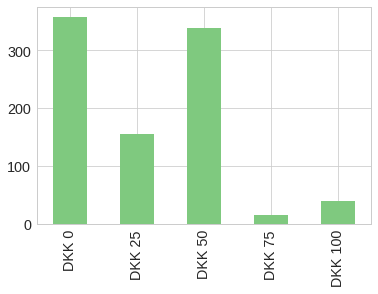

In [5]:
df.give_money__response.value_counts().loc[['DKK %d'%i for i in range(0, 101, 25)]].plot.bar() 

In [6]:
misc.questionSummary(df, q.homophily_popularity_dtu)

,response_index,answer_index,count
0,I den mindre populære halvdel,0.0,36
1,I den mere populære halvdel,1.0,307
2,Omtrent som gennemsnittet,2.0,528
3,Blandt de allermest populære,3.0,36
4,Blandt de allermindst populære,4.0,1


In [7]:
misc.questionSummary(df, q.homophily_popularity) 

,response_index,answer_index,count
0,Blandt de allermest populære,0.0,86
1,I den mere populære halvdel,1.0,316
2,Omtrent som gennemsnittet,2.0,405
3,I den mindre populære halvdel,3.0,88
4,Blandt de allermindst populære,4.0,10
5,Selvstuderende/havde ingen klasse,5.0,3


In [8]:
misc.questionSummary(df, q.homophily_socialize)

,response_index,answer_index,count
0,meget vigtig for mig,0.0,438
1,vigtig for mig,1.0,406
2,ikke så vigtig for mig,2.0,54
3,er ligegyldig,3.0,6
4,ved ikke,4.0,4


In [9]:
misc.questionSummary(df, q.live_alone)

,response_index,answer_index,count
0,Ja,0.0,365
1,Nej,1.0,543


Print `locus_of_control` questions

In [10]:
tmp = lambda st: int(re.search(r'(\d+)', st).groups()[0])
idx = sorted(df.filter(regex=r'locus_of_control.+__response').columns, key=tmp)
for col in idx:
    display(df[col].value_counts())

Mange af de ulykkelige ting der sker i folks liv er delvist fordi de er uheldige    478
Folks ulykke er et resultat af de fejl de laver                                     430
Name: locus_of_control_1__response, dtype: int64

Der vil altid være krige uanset hvor meget folk prøver at forebygge det                                   754
En af de primære årsager til at vi har krige er at folk ikke er tilstrækkeligt interesserede i politik    154
Name: locus_of_control_2__response, dtype: int64

Desværre bliver et individs værdi ofte overset uanset hvor meget  han eller hun prøver    476
I det lange løb får folk den respekt de fortjener i denne verden                          432
Name: locus_of_control_3__response, dtype: int64

Forestillingen om at lærere er unfair i forhold til studerende er nonsens                           560
De fleste studerende forstår ikke i hvor høj grad deres karakterer er påvirket af tilfældigheder    348
Name: locus_of_control_4__response, dtype: int64

Dygtige mennesker, der ikke bliver ledere har ikke udnyttet deres muligheder    570
Man kan ikke blive en effektiv leder uden ”held i sprøjten\                     338
Name: locus_of_control_5__response, dtype: int64

Nogle mennesker kan bare ikke lide en uansat hvad man gør                                         594
Folk der ikke kan få andre til at lide dem forstår ikke hvordan man finder ud af det med andre    314
Name: locus_of_control_6__response, dtype: int64

At overlade ting til skæbnen har aldrig fungeret ligeså godt for mig som at tage en beslutning om at gøre noget    577
Jeg oplever ofte at tingene går deres egen gang                                                                    331
Name: locus_of_control_7__response, dtype: int64

Når der er tale om en velforberedt studerende kan man sjældent, om nogensinde, tale om en unfair eksamen    797
Ofte er eksamensspørgsmål så langt fra pensum, at forberedelse reelt ikke giver mening                      111
Name: locus_of_control_8__response, dtype: int64

Det at få succes er et spørgsmål om hårdt arbejde. Held har intet, eller kun meget lidt at gøre med det    602
At få et godt job handler mest om at være på det rigtige sted på det rigtige tidspunkt                     306
Name: locus_of_control_9__response, dtype: int64

Den gennemsnitlige borger kan have indflydelse på politiske beslutninger                                    546
Verden køres af nogle få mennesker med magt, og der er ikke meget almindelige mennesker kan gøre ved det    362
Name: locus_of_control_10__response, dtype: int64

Når jeg laver planer, er jeg næsten sikker på, at jeg kan få dem til at fungere                                                 602
Det er ikke altid klogt at planlægge for langt ud i fremtiden, da mange ting alligevel ender med at blive afgjort tilfældigt    306
Name: locus_of_control_11__response, dtype: int64

Jeg får hvad jeg vil have. Det har intet, eller kun meget lidt, med held at gøre    720
Tit kan man ligeså godt slå plat eller krone, når man skal tage en beslutning       188
Name: locus_of_control_12__response, dtype: int64

Hvad der sker for mig, skyldes det jeg selv gør                                      756
Nogen gange føler jeg, at jeg ikke har nok kontrol over den retning mit liv tager    152
Name: locus_of_control_13__response, dtype: int64

In [11]:
misc.questionSummary(df, q.narcissism_looser)

,response_index,answer_index,count
0,Passer slet ikke 1,0.0,599
1,2,1.0,189
2,3,2.0,69
3,4,3.0,30
4,5,4.0,10
5,6 Passer fuldstændigt,5.0,11


In [12]:
idx = df.filter(regex='smoke.+__question').columns.str.replace('__question', '')
print(idx)
for col in idx:
    misc.questionSummary(df, col)

Index(['smoke_daily', 'smoke_freq', 'smoke_volume_cerut', 'smoke_volume_cigar',
       'smoke_volume_pibe', 'smoke_first_cigarette', 'smoke_volume_cigarette'],
      dtype='object')


,response_index,answer_index,count
0,12 år,3.0,2
1,13 år,4.0,3
2,14 år,5.0,5
3,15 år,6.0,9
4,16 eller mere,7.0,44


,response_index,answer_index,count
0,"Ja, dagligt",0.0,63
1,"Ja, men ikke dagligt",1.0,98
2,"Nej, men jeg har røget tidligere",2.0,120
3,"Nej, jeg har aldrig røget",3.0,627


,response_index,answer_index,count
0,0.0,0.0,63


,response_index,answer_index,count
0,0.0,0.0,63


,response_index,answer_index,count
0,0.0,0.0,63


,response_index,answer_index,count
0,9 år eller yngre,0.0,6
1,10 år,1.0,4
2,11 år,2.0,4
3,12 år,3.0,13
4,13 år,4.0,27
5,14 år,5.0,65
6,15 år,6.0,60
7,16 eller mere,7.0,104


,response_index,answer_index,count
0,0.0,0.0,1
1,2.0,2.0,2
2,3.0,3.0,3
3,5.0,5.0,11
4,6.0,6.0,3
5,7.0,7.0,2
6,8.0,8.0,4
7,9.0,9.0,1
8,10.0,10.0,13
9,12.0,12.0,1


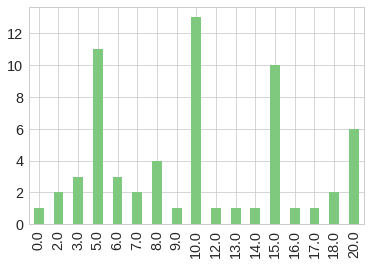

In [13]:
misc.questionResponse(df, q.smoke_volume_cigarette).plot.bar() 

In [14]:
df.head() 

,function_duties__answer,function_duties__answer_type,function_duties__question,function_duties__response,function_duties__condition,narcissism_opponents__answer,narcissism_opponents__answer_type,narcissism_opponents__question,narcissism_opponents__response,narcissism_opponents__condition,...,selfesteem_proud__answer_type,selfesteem_proud__question,selfesteem_proud__response,selfesteem_proud__condition,narcissism_excellent__answer,narcissism_excellent__answer_type,narcissism_excellent__question,narcissism_excellent__response,narcissism_excellent__condition,gender
u0001,0.0,radio,At varetage dine praktiske pligter i hjemmet?,Slet ikke,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,3.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,4,False,male
u0002,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,2.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",3,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,2.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,3,False,male
u0003,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Enig,False,1.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,2,False,male
u0004,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,2.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",3,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,1.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,2,False,male
u0006,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Stærkt uenig,False,0.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,Passer slet ikke 1,False,female


In [15]:
alcohol_volume_alldays = df.filter(regex='alcohol_volume_.+_answer$')
alcohol_volume_alldays = alcohol_volume_alldays.rename(columns=lambda s: s.replace('alcohol_volume_', '').replace('__answer', '').title())
alcohol_volume_alldays = alcohol_volume_alldays[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
alcohol_volume_weekdays = alcohol_volume_alldays.drop(['Saturday', 'Friday'], axis=1) 

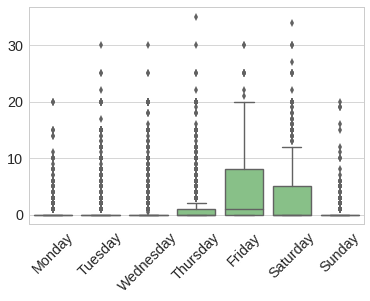

In [16]:
fig, ax = plt.subplots() 
sns.boxplot(data=alcohol_volume_alldays, color=colorcycle[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45); 

In [17]:
user_alcohol_weekdays = alcohol_volume_weekdays.sum(axis=1) 
user_alcohol_weekend = alcohol_volume_alldays.drop(alcohol_volume_weekdays.columns, axis=1)

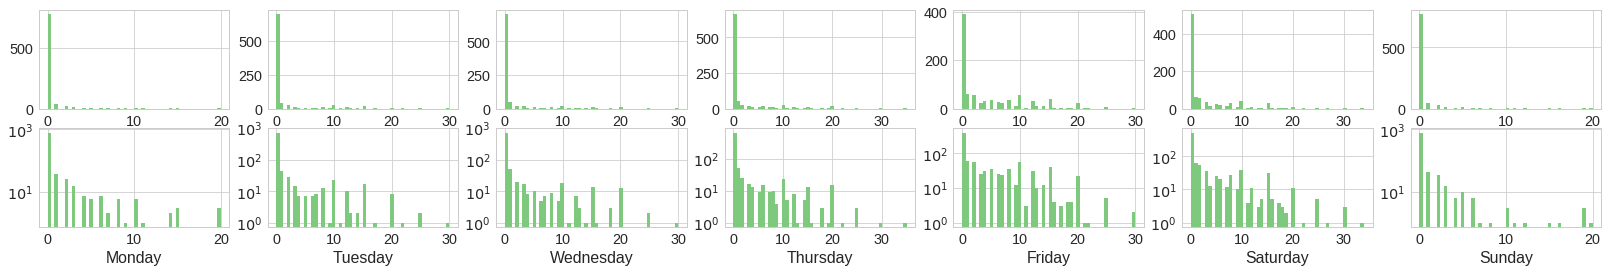

In [18]:
fig, (axr1, axr2) = plt.subplots(2, 7, figsize=(4*7, 4))
for ax, day in zip(axr1, alcohol_volume_alldays.columns):
    alcohol_volume_alldays[day].plot.hist(50, ax=ax) 
    ax.set_ylabel('')
for ax, day in zip(axr2, alcohol_volume_alldays.columns):
    ax.set_yscale('log')
    alcohol_volume_alldays[day].plot.hist(50, ax=ax) 
    ax.set_ylabel('')
    ax.set_xlabel(day)

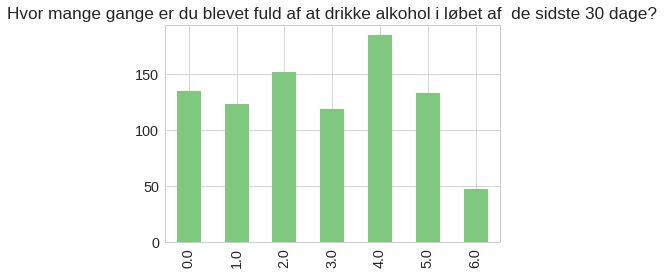

In [19]:
ax = df.alcohol_drunk__answer.value_counts().sort_index().plot.bar() 
ax.set_title(re.sub(r'\</?u\>', '', df.alcohol_drunk__question.iloc[0])) 

## Bør man kode det som 0, 1, 2, 3, 4 eller som 0, 1, 2, 3, 4.5, 6.5?

In [20]:
for el in f.alcohol_everyday.iloc[0, :]:
    print(el)

df.alcohol_everyday__answer.value_counts() 

0.0
radio
Drukket dig fuld på en hverdagsaften/dag, hvor du skulle i skole eller på dit fuldtidsjob dagen efter
0 gange
alcohol_debut != 'Jeg har aldrig drukket alkohol'


0.0    755
1.0     98
2.0     24
3.0     11
5.0      6
4.0      2
Name: alcohol_everyday__answer, dtype: int64

In [21]:
alcohol_everyday = f.alcohol_everyday
alcohol_everyday.alcohol_everyday__response.value_counts().sort_index()  

0 gange      755
1 gange       98
2 gange       24
3 gange       11
4-5 gange      2
6+ gange       6
Name: alcohol_everyday__response, dtype: int64